In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np# Import the API key.

from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
# Changed size from 1500 to 100 for testing
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [6]:
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bacolod
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | tyazhinskiy
Processing Record 4 of Set 1 | piterka
Processing Record 5 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | loukhi
Processing Record 8 of Set 1 | los llanos de aridane
Processing Record 9 of Set 1 | kutum
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | westport
Processing Record 12 of Set 1 | phan rang
City not found. Skipping...
Processing Record 13 of Set 1 | sankarpur
Processing Record 14 of Set 1 | sedro-woolley
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | mingshui
Processing Record 17 of Set 1 | eslov
Processing Record 18 of Set 1 | zaozhuang
Processing Record 19 of Set 1 | pangnirtung
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | esmeraldas


Processing Record 38 of Set 4 | ahipara
Processing Record 39 of Set 4 | oktyabrskiy
Processing Record 40 of Set 4 | klaksvik
Processing Record 41 of Set 4 | tessalit
Processing Record 42 of Set 4 | hasaki
Processing Record 43 of Set 4 | qom
Processing Record 44 of Set 4 | vallenar
Processing Record 45 of Set 4 | portobelo
Processing Record 46 of Set 4 | palmer
Processing Record 47 of Set 4 | kavieng
Processing Record 48 of Set 4 | mahebourg
Processing Record 49 of Set 4 | husavik
Processing Record 50 of Set 4 | clyde river
Processing Record 1 of Set 5 | namibe
Processing Record 2 of Set 5 | huarmey
Processing Record 3 of Set 5 | mount gambier
Processing Record 4 of Set 5 | iratosu
Processing Record 5 of Set 5 | roald
Processing Record 6 of Set 5 | kruisfontein
Processing Record 7 of Set 5 | ucluelet
Processing Record 8 of Set 5 | tsimlyansk
Processing Record 9 of Set 5 | ruteng
Processing Record 10 of Set 5 | menongue
Processing Record 11 of Set 5 | nouadhibou
Processing Record 12 of S

Processing Record 25 of Set 8 | yar-sale
Processing Record 26 of Set 8 | beya
Processing Record 27 of Set 8 | svetlogorsk
Processing Record 28 of Set 8 | marshall
Processing Record 29 of Set 8 | verkhoyansk
Processing Record 30 of Set 8 | konevo
Processing Record 31 of Set 8 | faanui
Processing Record 32 of Set 8 | bogorodskoye
Processing Record 33 of Set 8 | ryomgard
Processing Record 34 of Set 8 | santa barbara
Processing Record 35 of Set 8 | sioux lookout
Processing Record 36 of Set 8 | urengoy
Processing Record 37 of Set 8 | rock sound
Processing Record 38 of Set 8 | troitsko-pechorsk
Processing Record 39 of Set 8 | kamaishi
Processing Record 40 of Set 8 | cape elizabeth
City not found. Skipping...
Processing Record 41 of Set 8 | champerico
Processing Record 42 of Set 8 | tres picos
Processing Record 43 of Set 8 | sorong
Processing Record 44 of Set 8 | coihaique
Processing Record 45 of Set 8 | norman wells
Processing Record 46 of Set 8 | pimentel
Processing Record 47 of Set 8 | kau

Processing Record 15 of Set 12 | yakymivka
Processing Record 16 of Set 12 | thai binh
Processing Record 17 of Set 12 | mosquera
Processing Record 18 of Set 12 | mendi
Processing Record 19 of Set 12 | sao joao da barra
Processing Record 20 of Set 12 | kabare
Processing Record 21 of Set 12 | manado
Processing Record 22 of Set 12 | lahij
Processing Record 23 of Set 12 | shimoda
Processing Record 24 of Set 12 | paradise valley
Processing Record 25 of Set 12 | meteti
Processing Record 26 of Set 12 | wuda
Processing Record 27 of Set 12 | madanapalle
Processing Record 28 of Set 12 | awjilah
Processing Record 29 of Set 12 | jalu
Processing Record 30 of Set 12 | sataua
City not found. Skipping...
Processing Record 31 of Set 12 | karamay
City not found. Skipping...
Processing Record 32 of Set 12 | beatrice
Processing Record 33 of Set 12 | mugango
Processing Record 34 of Set 12 | the valley
Processing Record 35 of Set 12 | chifeng
Processing Record 36 of Set 12 | cabatuan
Processing Record 37 of 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bacolod,10.6667,122.9500,78.30,87,95,6.33,PH,2022-07-12 18:32:06
1,Punta Arenas,-53.1500,-70.9167,32.11,100,100,5.75,CL,2022-07-12 18:25:29
2,Tyazhinskiy,56.1160,88.5240,53.04,90,100,4.54,RU,2022-07-12 18:32:07
3,Piterka,50.6803,47.4454,77.52,55,39,11.03,RU,2022-07-12 18:32:07
4,Mar Del Plata,-38.0023,-57.5575,55.09,56,40,12.66,AR,2022-07-12 18:29:41


In [10]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bacolod,PH,2022-07-12 18:32:06,10.6667,122.9500,78.30,87,95,6.33
1,Punta Arenas,CL,2022-07-12 18:25:29,-53.1500,-70.9167,32.11,100,100,5.75
2,Tyazhinskiy,RU,2022-07-12 18:32:07,56.1160,88.5240,53.04,90,100,4.54
3,Piterka,RU,2022-07-12 18:32:07,50.6803,47.4454,77.52,55,39,11.03
4,Mar Del Plata,AR,2022-07-12 18:29:41,-38.0023,-57.5575,55.09,56,40,12.66


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

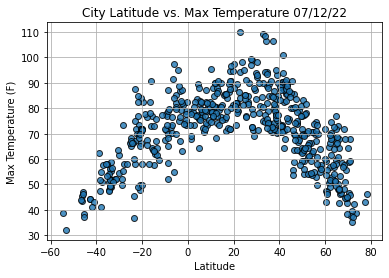

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

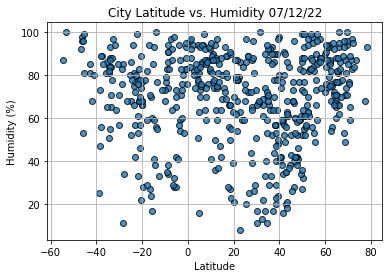

In [20]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

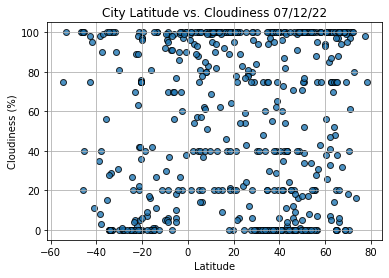

In [21]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

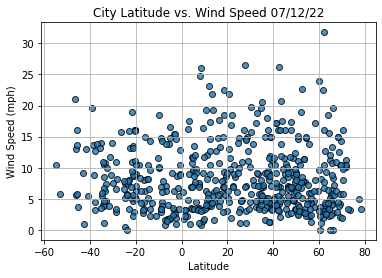

In [22]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()